Objective
We will try to build a machine learning model to accurately predict the stoppage time of cars caused by congestion in 4 major US cities.

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
%matplotlib inline

In [2]:
#reading the dataframes
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

#### EDA

In [5]:
test.head()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,Month,Path,City
0,0,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,NE,NE,0,0,6,Peachtree Street Southwest_NE_Peachtree Street...,Atlanta
1,1,1,33.75094,-84.393032,Peachtree Street Southwest,Mitchell Street Southwest,SW,SE,0,0,6,Peachtree Street Southwest_SW_Mitchell Street ...,Atlanta
2,2,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,SW,SW,0,0,6,Peachtree Street Southwest_SW_Peachtree Street...,Atlanta
3,3,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,NE,NE,1,0,6,Peachtree Street Southwest_NE_Peachtree Street...,Atlanta
4,4,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,SW,SW,1,0,6,Peachtree Street Southwest_SW_Peachtree Street...,Atlanta


In [6]:
train.head()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City
0,1921357,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
1,1921358,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
2,1921359,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
3,1921360,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
4,1921361,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta


In [3]:
train.isnull().sum()
test.isnull().sum()

RowId                  0
IntersectionId         0
Latitude               0
Longitude              0
EntryStreetName    19198
ExitStreetName     15587
EntryHeading           0
ExitHeading            0
Hour                   0
Weekend                0
Month                  0
Path                   0
City                   0
dtype: int64

In [4]:
train.describe()
test.describe()

,RowId,IntersectionId,Latitude,Longitude,Hour,Weekend,Month
count,1.921357e+06,1.921357e+06,1.921357e+06,1.921357e+06,1.921357e+06,1.921357e+06,1.921357e+06
mean,9.606780e+05,8.375807e+02,3.967647e+01,-7.787487e+01,1.242410e+01,2.713171e-01,9.099713e+00
std,5.546481e+05,6.474817e+02,2.915613e+00,5.973443e+00,5.997195e+00,4.446394e-01,1.993396e+00
min,0.000000e+00,0.000000e+00,3.364997e+01,-8.789715e+01,0.000000e+00,0.000000e+00,1.000000e+00
25%,4.803390e+05,3.000000e+02,3.993964e+01,-8.438431e+01,8.000000e+00,0.000000e+00,7.000000e+00
50%,9.606780e+05,6.850000e+02,4.001254e+01,-7.517135e+01,1.200000e+01,0.000000e+00,9.000000e+00
75%,1.441017e+06,1.257000e+03,4.194657e+01,-7.504245e+01,1.700000e+01,1.000000e+00,1.100000e+01
max,1.921356e+06,2.875000e+03,4.240692e+01,-7.099715e+01,2.300000e+01,1.000000e+00,1.200000e+01


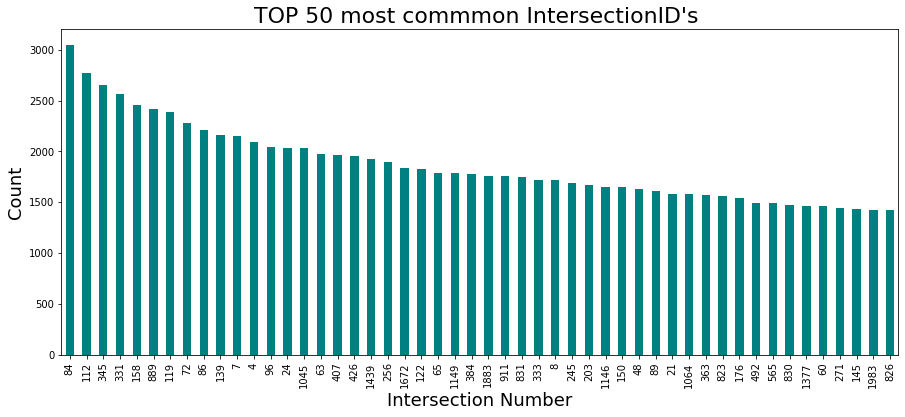

In [7]:
'''Visulization of IntersectionID'''
plt.figure(figsize=(15,6))
train.IntersectionId.value_counts()[:50].plot(kind='bar', color = 'teal')
plt.xlabel("Intersection Number", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.title("TOP 50 most commmon IntersectionID's ", fontsize=22)
plt.show()

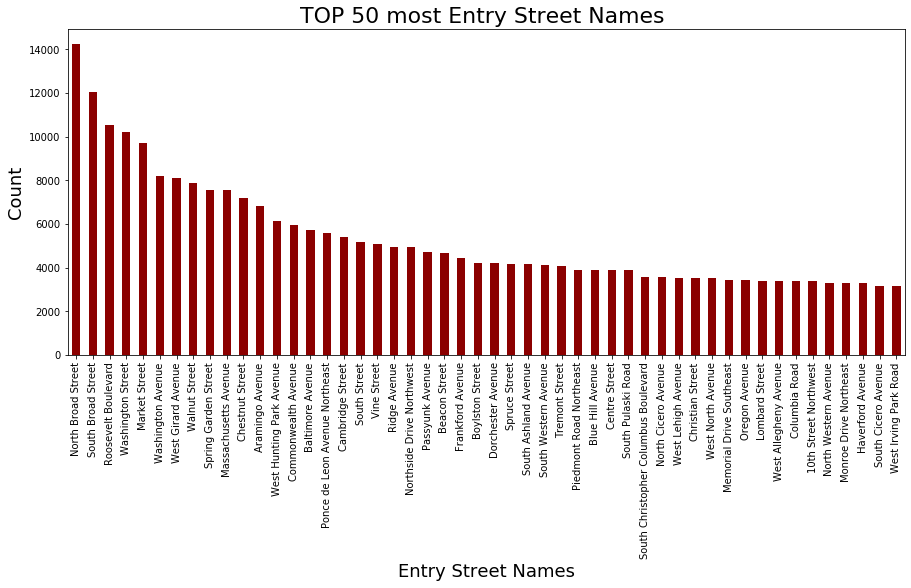

In [8]:
'''Visulization of Entry/Exit StreetNames'''
plt.figure(figsize=(15,6))
train['EntryStreetName'].value_counts()[:50].plot(kind='bar', color = 'darkred')
plt.xlabel("Entry Street Names", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.title("TOP 50 most Entry Street Names ", fontsize=22)
plt.show()

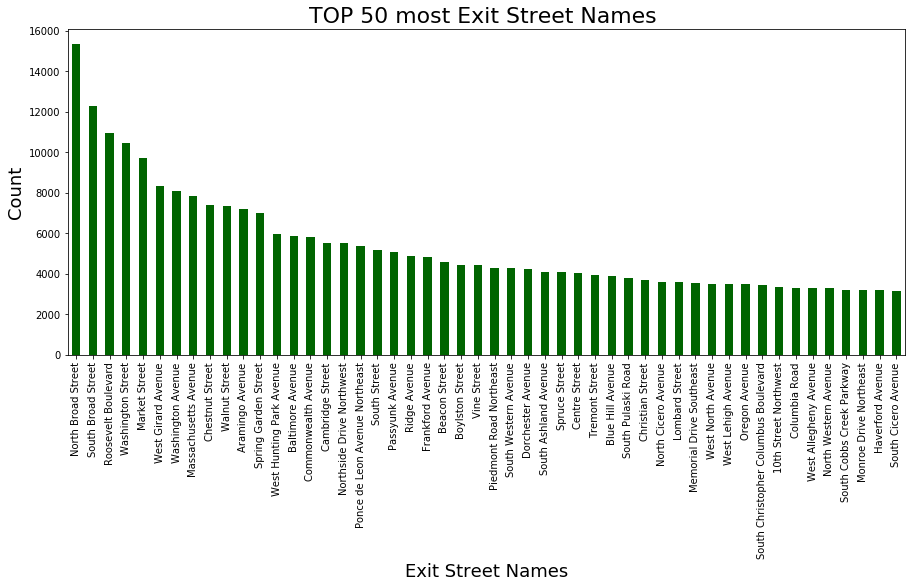

In [9]:
plt.figure(figsize=(15,6))
train['ExitStreetName'].value_counts()[:50].plot(kind='bar', color = 'darkgreen')
plt.xlabel("Exit Street Names", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.title("TOP 50 most Exit Street Names ", fontsize=22)
plt.show()


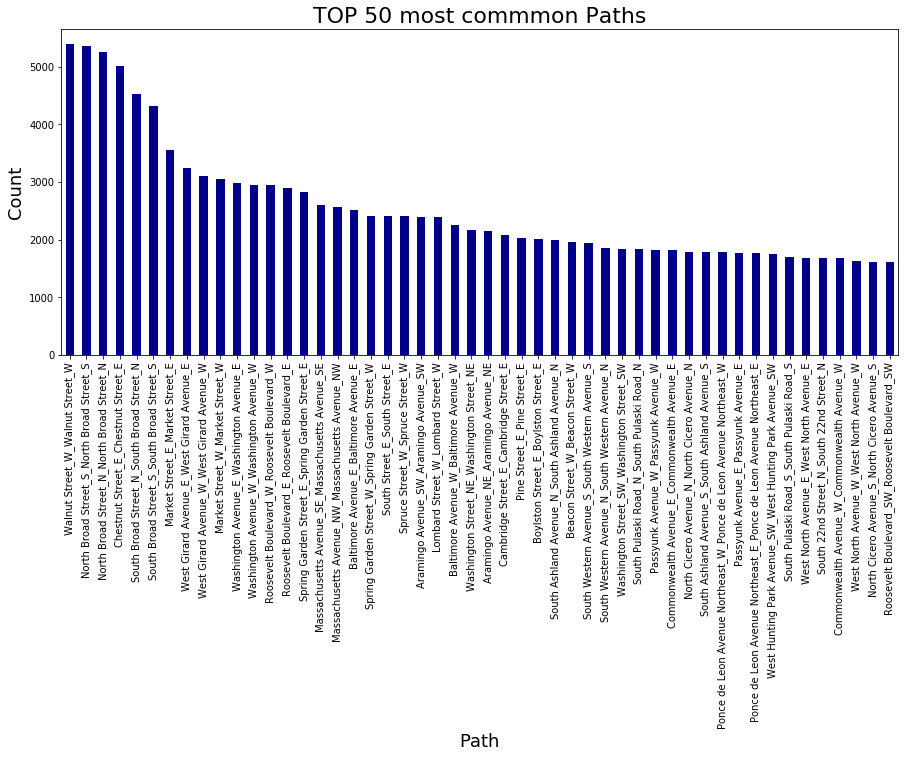

In [10]:
'''Visulization of Path'''
plt.figure(figsize=(15,6))
train.Path.value_counts()[:50].plot(kind='bar', color = 'darkblue')
plt.xlabel("Path", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.title("TOP 50 most commmon Paths", fontsize=22)
plt.show()

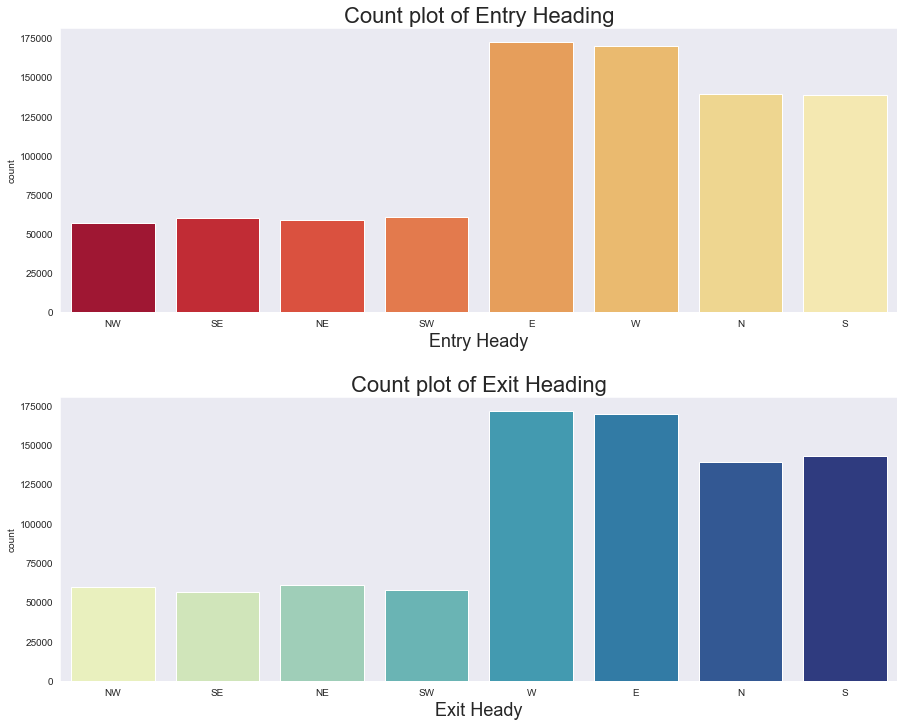

In [11]:

sns.set_style("dark")
fig, ax = plt.subplots(2,1, figsize=[15, 12])

sns.countplot(data=train, x = 'EntryHeading', ax=ax[0], palette = 'YlOrRd_r')
ax[0].set_title('Count plot of Entry Heading', fontsize = 22)
ax[0].set_xlabel('Entry Heady', fontsize = 18)

sns.countplot(data=train, x='ExitHeading', ax=ax[1], palette = 'YlGnBu')
ax[1].set_title('Count plot of Exit Heading', fontsize = 22)
ax[1].set_xlabel('Exit Heady', fontsize = 18)

plt.subplots_adjust(hspace = 0.3)
plt.show()

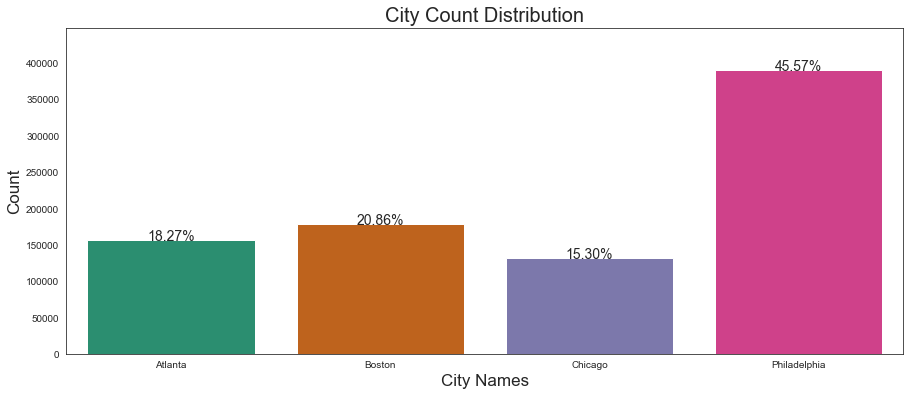

In [12]:
total = len(train)
plt.figure(figsize=(15,6))
sns.set_style("white")

ax = sns.countplot(x="City", data=train, palette='Dark2')
ax.set_title("City Count Distribution", fontsize=20)
ax.set_ylabel("Count",fontsize= 17)
ax.set_xlabel("City Names", fontsize=17)
sizes=[]
for p in ax.patches:
    height = p.get_height()
    sizes.append(height)
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
ax.set_ylim(0, max(sizes) * 1.15)

plt.show()


We can observe that in general Entry and Exit Heading is exactly the same.

Most of vehicles are heading toward East and West.

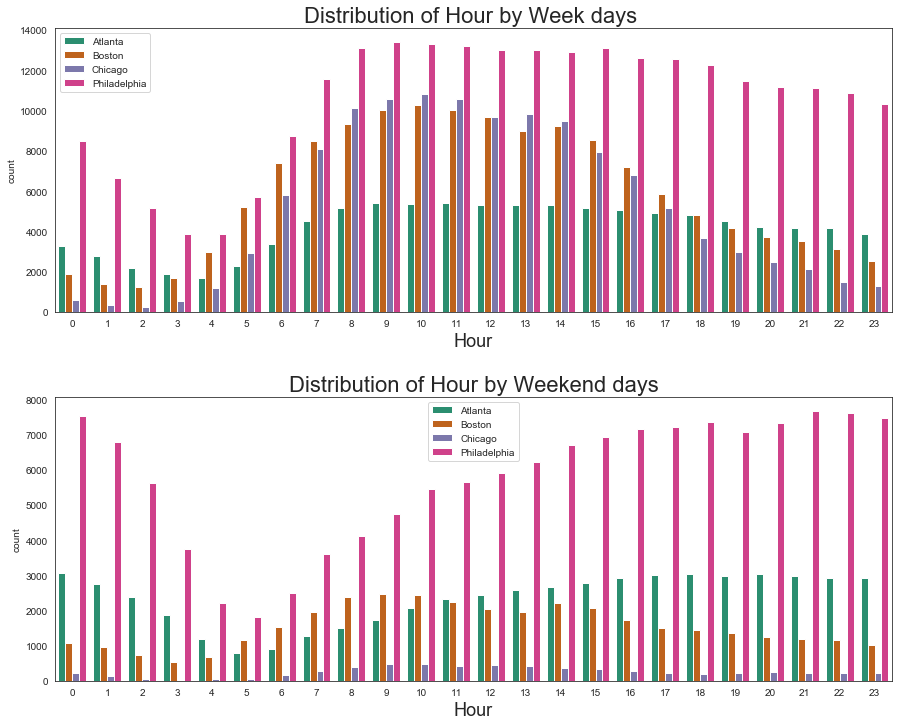

In [13]:
fig, ax = plt.subplots(2,1, figsize=[15, 12])

sns.countplot(data=train[train['Weekend']==0], x='Hour', hue ='City', ax=ax[0], palette='Dark2')
ax[0].legend()
ax[0].set_title('Distribution of Hour by Week days ', fontsize=22)
ax[0].set_xlabel('Hour', fontsize = 18)

sns.countplot(data = train[train['Weekend']==1], x='Hour', hue='City', ax=ax[1], palette='Dark2')
ax[1].legend()
ax[1].set_title('Distribution of Hour by Weekend days', fontsize=22)
ax[1].set_xlabel('Hour', fontsize = 18)

plt.subplots_adjust(hspace = 0.3)
plt.show()


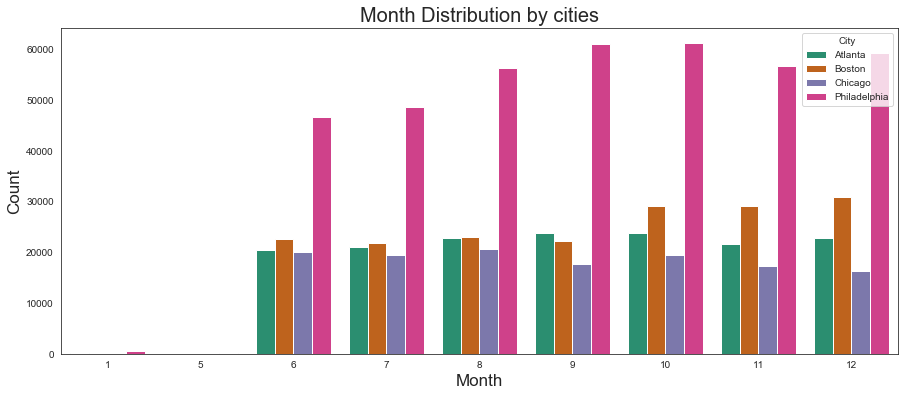

In [14]:
plt.figure(figsize=(15,6))
ax = sns.countplot(x="Month", data=train, hue='City',palette='Dark2')
ax.set_title("Month Distribution by cities", fontsize=20)
ax.set_ylabel("Count",fontsize= 17)
ax.set_xlabel("Month", fontsize=17)
plt.show()

##### Findings:
        In the city count distribution:
             Philadelphia have 45.29% of the total entries followed by Boston(21.23%), Atlanta(17.89%), Chicago(15.59%).
        In the Distribution of Hour by Week days:
             Between 08:00 to 17:00, is the rush hour in all cities, but for Philadelphia, it is 08:00 to 24:00.
        In the Distribution of Hour by Weeked days:
             All the cities are by far the most common in all hours during the weekend, only on 05:00 to 7:00.
        In the Distribution of month by cities:
             It's seem that we have only six month of data only.

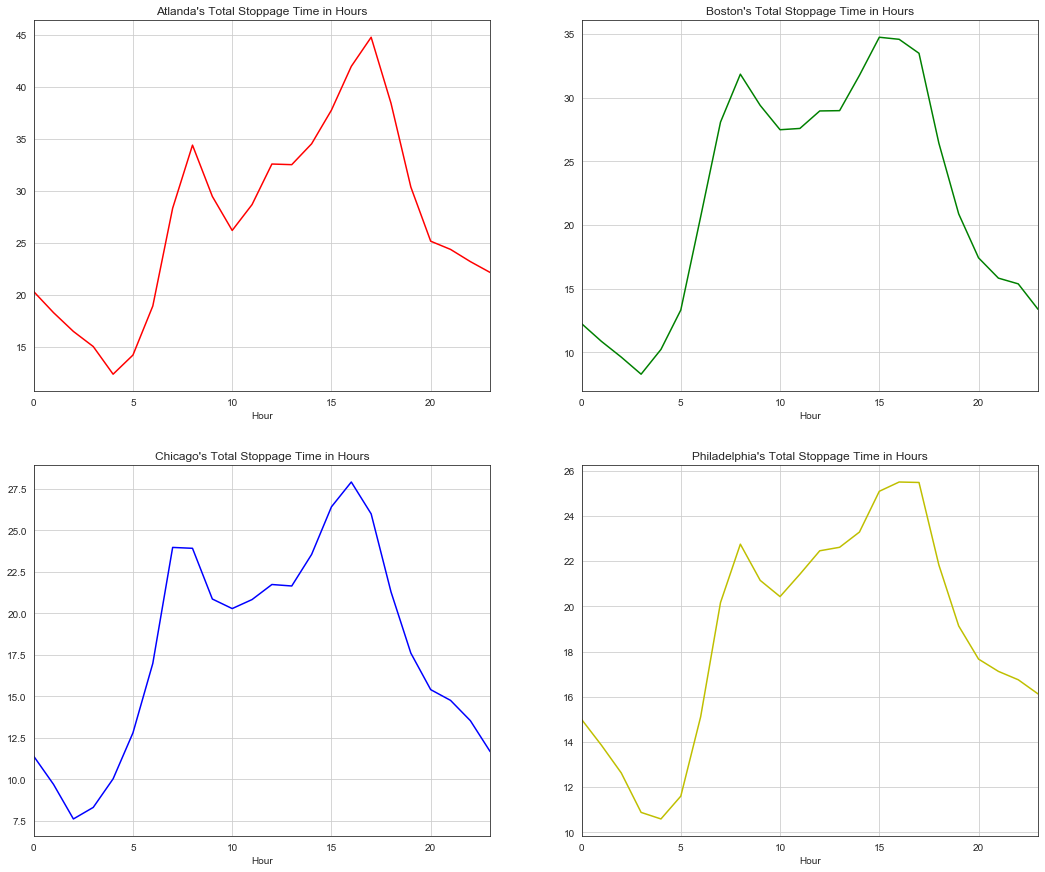

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=2)
sns.set_style("whitegrid")

train[train['City']=='Atlanta'].groupby('Hour')['TotalTimeStopped_p80'].mean().plot(
    ax=ax[0,0],title="Atlanda's Total Stoppage Time in Hours", color='r', figsize=(18,15))

train[train['City']=='Boston'].groupby('Hour')['TotalTimeStopped_p80'].mean().plot(
    ax=ax[0,1],title="Boston's Total Stoppage Time in Hours", color='g', figsize=(18,15))


train[train['City']=='Chicago'].groupby('Hour')['TotalTimeStopped_p80'].mean().plot(
    ax=ax[1,0],title="Chicago's Total Stoppage Time in Hours", color='b', figsize=(18,15))


train[train['City']=='Philadelphia'].groupby('Hour')['TotalTimeStopped_p80'].mean().plot(
    ax=ax[1,1],title="Philadelphia's Total Stoppage Time in Hours", color='y', figsize=(18,15))

plt.show()

the stoppage time seems to be peeking at around the same time window through the day.

#### Feature Engineering / Data Manipulation

In [16]:
'''One Hot Ecoding of City feature'''
train = pd.concat([train, pd.get_dummies(train['City'], drop_first = False)], axis=1)
test = pd.concat([test, pd.get_dummies(test['City'], drop_first = False)], axis=1)

I am adding rainfall because these values may affect the taffic stoppage time in cities, collected the data from google

In [18]:
monthly_rainfall = {'Atlanta1': 5.02, 'Atlanta5': 3.95, 'Atlanta6': 3.63, 'Atlanta7': 5.12, 'Atlanta8': 3.67, 'Atlanta9': 4.09,
              'Atlanta10': 3.11, 'Atlanta11': 4.10, 'Atlanta12': 3.82, 'Boston1': 3.92, 'Boston5': 3.24, 'Boston6': 3.22,
              'Boston7': 3.06, 'Boston8': 3.37, 'Boston9': 3.47, 'Boston10': 3.79,'Boston11': 3.98, 'Boston12': 3.73,
              'Chicago1': 1.75, 'Chicago5': 3.38, 'Chicago6': 3.63, 'Chicago7': 3.51, 'Chicago8': 4.62, 'Chicago9': 3.27,
              'Chicago10': 2.71,  'Chicago11': 3.01, 'Chicago12': 2.43, 'Philadelphia1': 3.52, 'Philadelphia5': 3.88,
              'Philadelphia6': 3.29, 'Philadelphia7': 4.39, 'Philadelphia8': 3.82, 'Philadelphia9':3.88 , 'Philadelphia10': 2.75,
              'Philadelphia11': 3.16, 'Philadelphia12': 3.31}

In [19]:
# Concatenating the city and month into one variable so I can map it to the above rainfall dictionary
train['city_month'] = train["City"] + train["Month"].astype(str)
test['city_month'] = test["City"] + test["Month"].astype(str)


In [20]:
# Creating a new column by mapping the city_month variable to it's corresponding average monthly rainfall
train["average_rainfall"] = train['city_month'].map(monthly_rainfall)
test["average_rainfall"] = test['city_month'].map(monthly_rainfall)

In [21]:
#Standardizing lat-long
scaler = StandardScaler()
lat_long = ['Latitude', 'Longitude']
for col in lat_long:
    train[col] = (scaler.fit_transform(train[col].values.reshape(-1, 1)))
    test[col] = (scaler.fit_transform(test[col].values.reshape(-1, 1)))

In [22]:
"""Let's drop the unwanted variables from test and train dataset"""
train.drop(['RowId', 'EntryStreetName', 'ExitStreetName', 'Path', 'city_month', 'City'], axis=1, inplace=True)
test.drop(['RowId', 'EntryStreetName', 'ExitStreetName', 'Path', 'city_month', 'City'], axis=1, inplace=True)

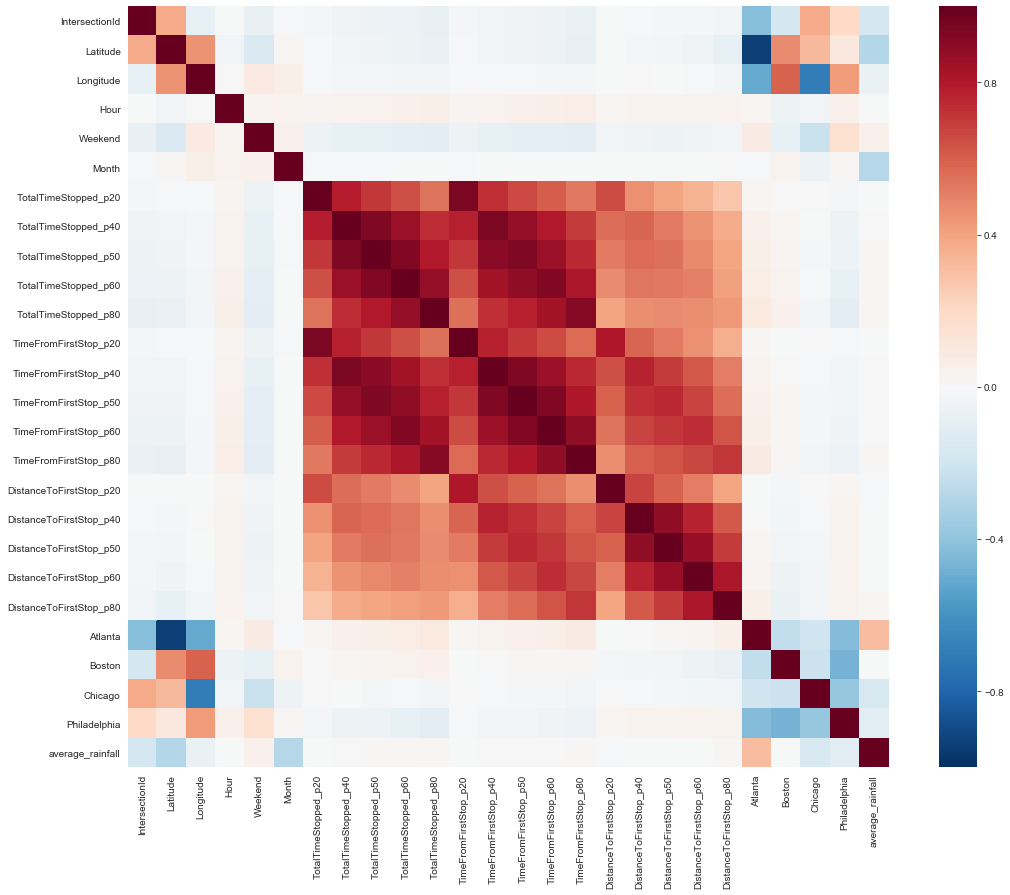

In [23]:
plt.figure(figsize=(18,14))
sns.heatmap(train.corr(),vmin=-1, vmax=1, center=0,
            square=True, cmap = 'RdBu_r')
plt.show()


In [24]:
#creating the dummies
dfen = pd.get_dummies(train['EntryHeading'], prefix='en')
dfex = pd.get_dummies(train['ExitHeading'], prefix='ex')
train = pd.concat([train, dfen], axis=1)
train = pd.concat([train, dfex], axis=1)

#Creating Dummies for test Data
dfent = pd.get_dummies(test["EntryHeading"],prefix = 'en')
dfext = pd.get_dummies(test["ExitHeading"],prefix = 'ex')
test = pd.concat([test,dfent],axis=1)
test = pd.concat([test,dfext],axis=1)

#### Modeling

when it comes to the target variable, the goal is to predict the total time stopped and I will also predict the distance to first stop.

there are multiples occurrences of these targets, p20, p50, p80... each will be a target variable and will be fit and predicted separately. then, we will combine the predictions and add them to the submission file

In [25]:
#Training Data
X = train[["IntersectionId","Hour","Weekend","Month",'en_E',
       'en_N', 'en_NE', 'en_NW', 'en_S', 'en_SE', 'en_SW', 'en_W', 'ex_E',
       'ex_N', 'ex_NE', 'ex_NW', 'ex_S', 'ex_SE', 'ex_SW', 'ex_W']]

y1 = train["TotalTimeStopped_p20"]
y2 = train["TotalTimeStopped_p50"]
y3 = train["TotalTimeStopped_p80"]
y4 = train["DistanceToFirstStop_p20"]
y5 = train["DistanceToFirstStop_p50"]
y6 = train["DistanceToFirstStop_p80"]



X_test = test[["IntersectionId","Hour","Weekend","Month",'en_E','en_N', 'en_NE', 'en_NW', 'en_S', 
              'en_SE', 'en_SW', 'en_W', 'ex_E','ex_N', 'ex_NE', 'ex_NW', 'ex_S', 'ex_SE', 'ex_SW', 'ex_W']]



since we are dealing with numerical target data I decided to use XGB Regressor after some research which is a similar version of the RandomForestRegressor. it seems to  be fitting the model better and had a lower error score when testing.

In [26]:
#Fit and predict
xgb_1 = XGBRegressor()
xgb_1.fit(X, y1)
pred_1 = xgb_1.predict(X_test)


xgb_2 = XGBRegressor()
xgb_2.fit(X, y2)
pred_2 = xgb_2.predict(X_test)


xgb_3 = XGBRegressor()
xgb_3.fit(X, y3)
pred_3 = xgb_3.predict(X_test)

xgb_4 = XGBRegressor()
xgb_4.fit(X, y4)
pred_4 = xgb_4.predict(X_test)

xgb_5 = XGBRegressor()
xgb_5.fit(X, y5)
pred_5 = xgb_5.predict(X_test)

xgb_6 = XGBRegressor()
xgb_6.fit(X, y6)
pred_6 = xgb_6.predict(X_test)


In [33]:
# Appending all predictions
prediction = []
for i in range(len(pred_1)):
    for j in [pred_1,pred_2,pred_3,pred_4,pred_5,pred_6]:
        prediction.append(j[i])
  

In [34]:
len(prediction)

11528142

In [35]:
prediction = prediction[:11522010] 

In [36]:
submission = pd.read_csv("sample_submission.csv")
submission["Target"] = prediction
submission.to_csv("Submission_final.csv", index = False)